# Student Performance Indicator

## 1. Understanding the Problem

* This Project understands the student's performance i.e. test scores, being affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch, Test preparation course.

## 2. Data Collection

* Dataset source - 
* Dataset has 8 Columns and 1000 Rows

## Importing Required Packages and Data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [25]:
df = pd.read_csv('data/stud.csv')

### Show Top 5 rows of the dataset

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [27]:
df.shape

(1000, 8)

## Dataset Information

*    gender : sex of students -> (Male/female)
*    race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
*    parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
*    lunch : having lunch before test (standard or free/reduced)
*    test preparation course : complete or not complete before test
*    math score
*    reading score
*    writing score

# 3. Data Cleaning Performed

*    Check Missing values
*    Check Duplicates
*    Check data type
*    Check the number of unique values of each column
*    Check statistics of data set
*    Check various categories present in the different categorical column

In [28]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [32]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Analysis
*   From above description of numerical data, all means are very close to each other - between 66 and 689.15.
*   All standard deviations are also close - between 14.6 and 15.19.
*   While there is a minimum score 0 for math, the same for writing minimum is 10 and for reading yet higher is 17.

In [33]:
# Number of numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [34]:
print("All the unique Categories in 'gender' variable :     ",end=" " )
print(df['gender'].unique())

print("All the unique Categories in 'race_ethnicity' variable :  ",end=" ")
print(df['race_ethnicity'].unique())

print("All the unique Categories in'parental level of education' variable :",end=" " )
print(df['parental_level_of_education'].unique())

print("All the unique Categories in 'lunch' variable :     ",end=" " )
print(df['lunch'].unique())

print("All the unique Categories in 'test preparation course' variable :     ",end=" " )
print(df['test_preparation_course'].unique())

All the unique Categories in 'gender' variable :      ['female' 'male']
All the unique Categories in 'race_ethnicity' variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
All the unique Categories in'parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
All the unique Categories in 'lunch' variable :      ['standard' 'free/reduced']
All the unique Categories in 'test preparation course' variable :      ['none' 'completed']


### Adding columns - "Total Score" and "Average"

In [35]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
# Number of students who got full marks
math_full = df[df['math_score'] == 100]['gender'].count()
reading_full = df[df['reading_score'] == 100]['gender'].count()
writing_full = df[df['writing_score'] == 100]['gender'].count()

print(f'Number of students with a perfect score in Maths: {math_full}')
print(f'Number of students with a perfect score in Reading: {reading_full}')
print(f'Number of students with a perfect score in Writing: {writing_full}')

Number of students with a perfect score in Maths: 7
Number of students with a perfect score in Reading: 17
Number of students with a perfect score in Writing: 14


In [37]:
math_less_25 = df[df['math_score'] <= 25]['gender'].count()
reading_less_25 = df[df['reading_score'] <= 25]['gender'].count()
writing_less_25 = df[df['writing_score'] <= 25]['gender'].count()

print(f'Number of students with less than 25 marks in Maths: {math_less_25}')
print(f'Number of students with less than 25 marks in Reading: {reading_less_25}')
print(f'Number of students with less than 25 marks in Writing: {writing_less_25}')

Number of students with less than 25 marks in Maths: 7
Number of students with less than 25 marks in Reading: 4
Number of students with less than 25 marks in Writing: 5


### Analysis
* Students have best performance in Reading and worst in Math

## Data Exploration

* Histogram
* Kernel Distribution Function (KDE)

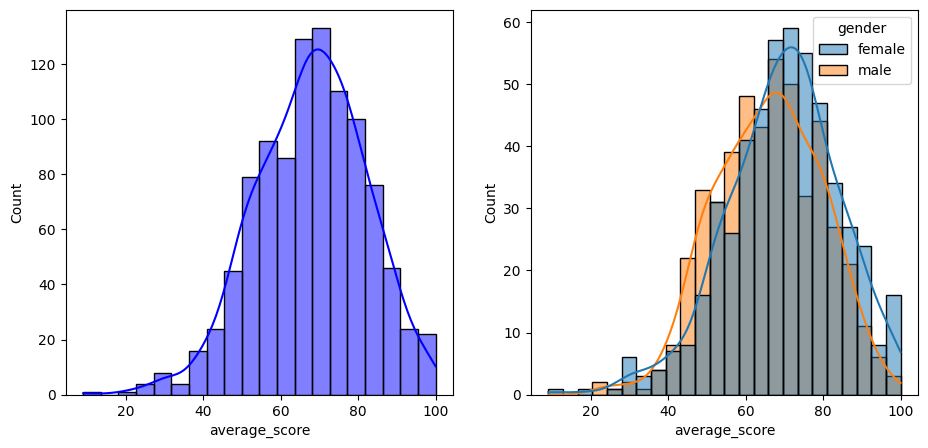

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=20,kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

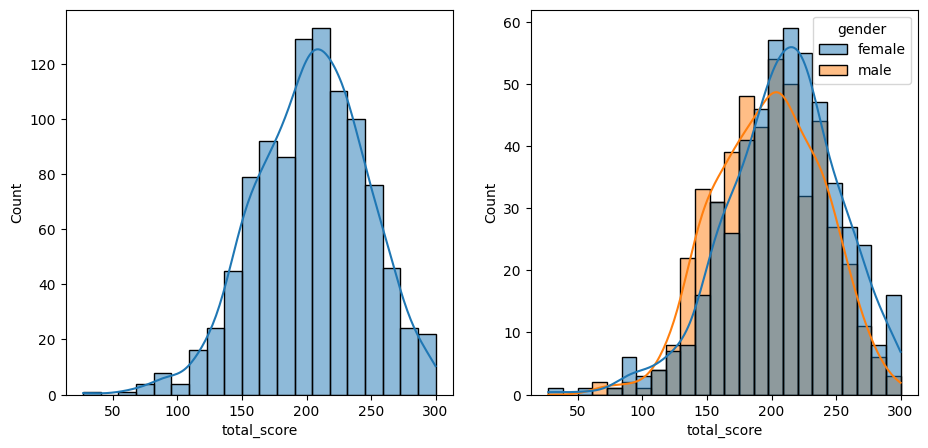

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=20,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

### Analysis
* Female students tends to perform better than male students.

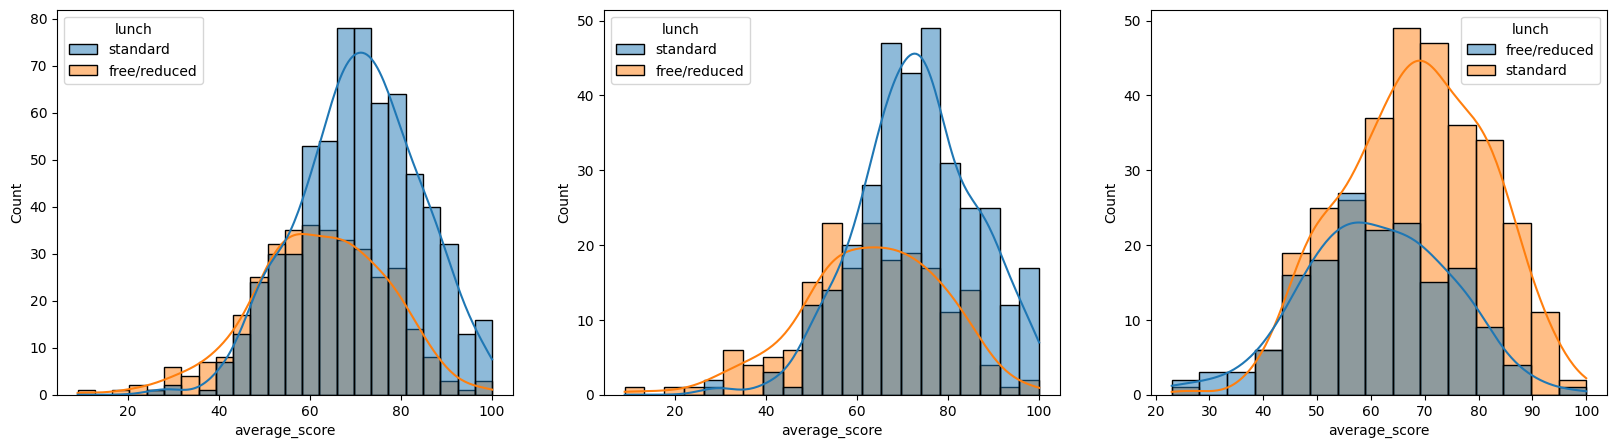

In [40]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

### Analysis
* Standard lunch before the exams improves performance in exams be it a male or a female.

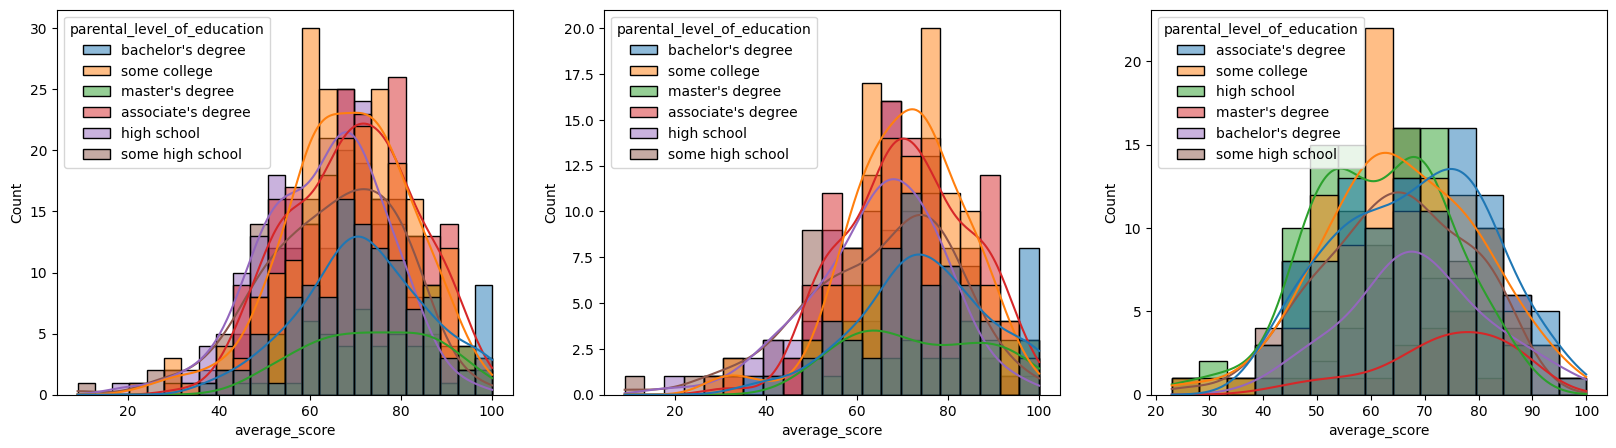

In [41]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

### Analysis
* In general parent's level of education doesn't affect students performance in exam.

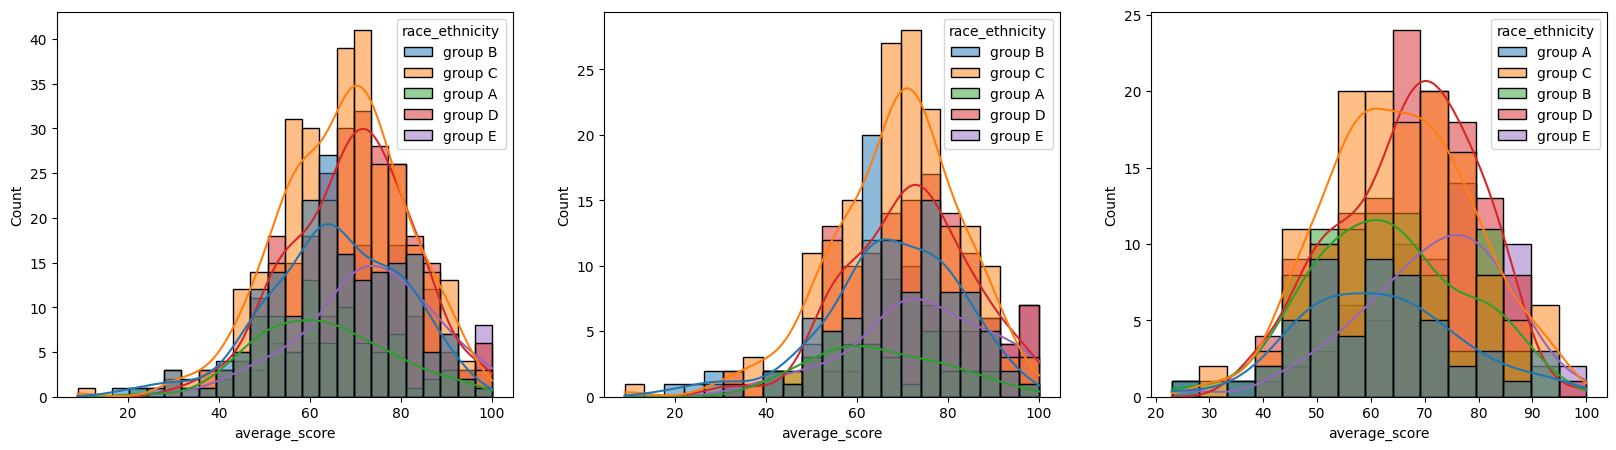

In [42]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(1,3,2)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(1,3,3)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

### Analysis
* Students of group A and group B tends to perform poorly in exam, while students of group C and group D tend to perform well, especially female students of Group D.

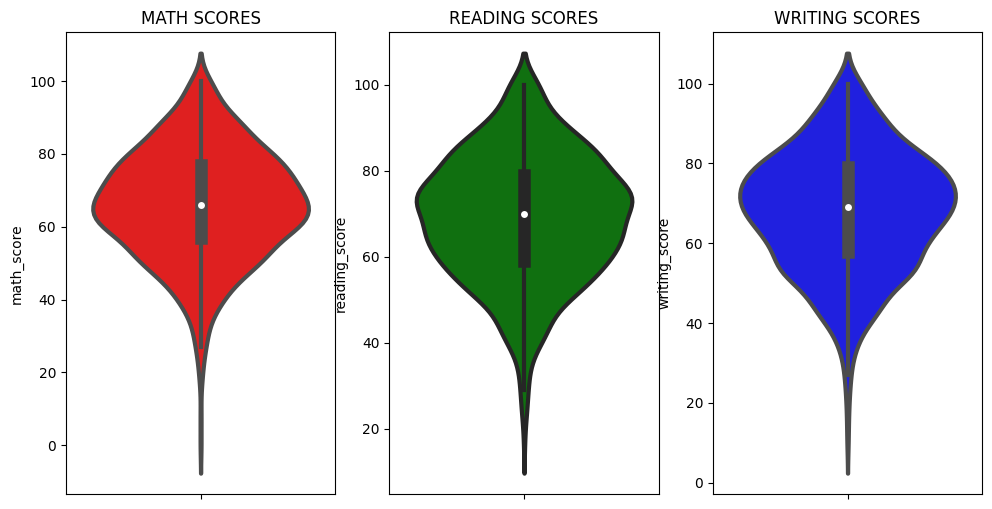

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Analysis
* From the above three plots, it is clearly visible that most of the student's score lies in between 50-90.

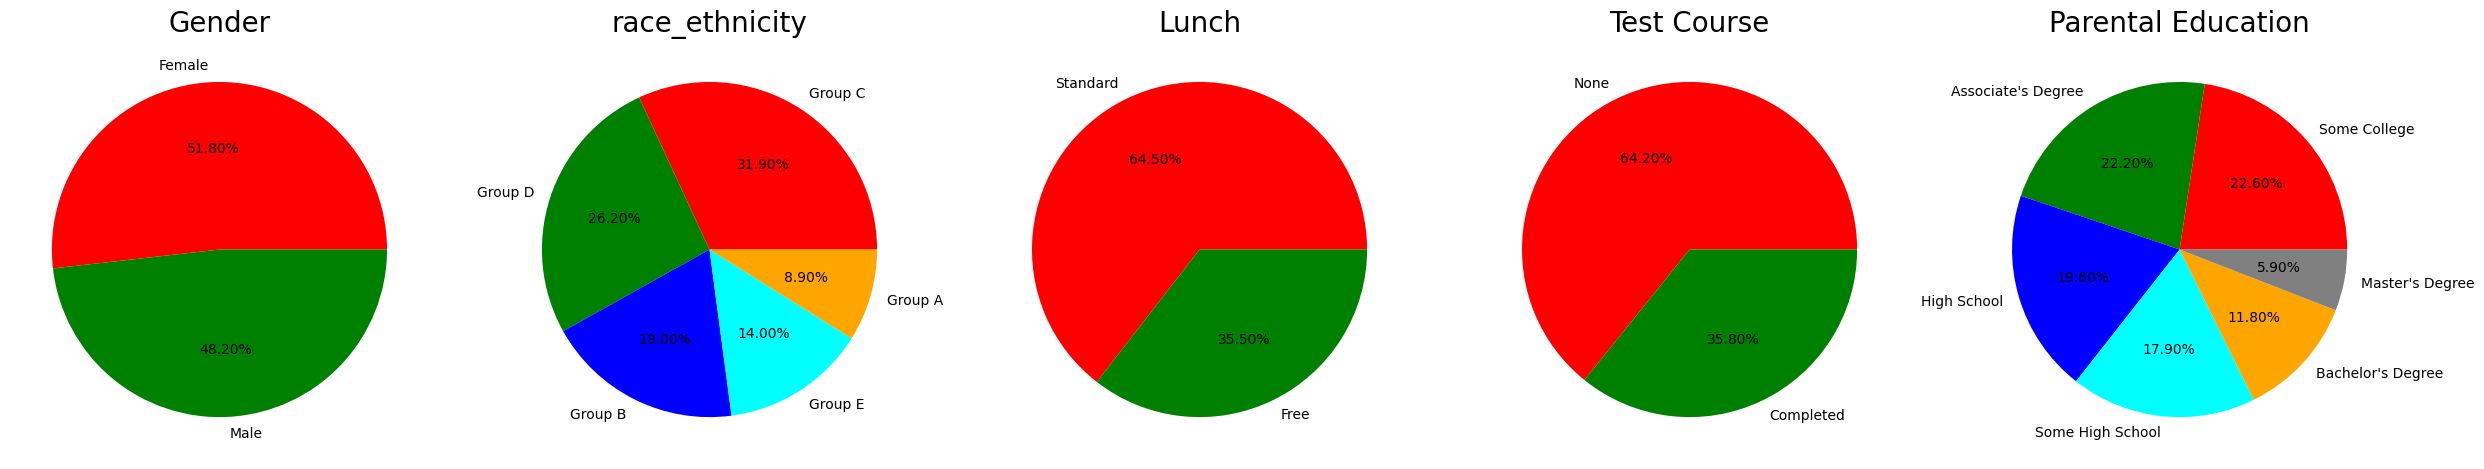

In [44]:
plt.rcParams['figure.figsize'] = (25, 15)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%1.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Analysis
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature Wise Visualization

## GENDER COLUMN

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

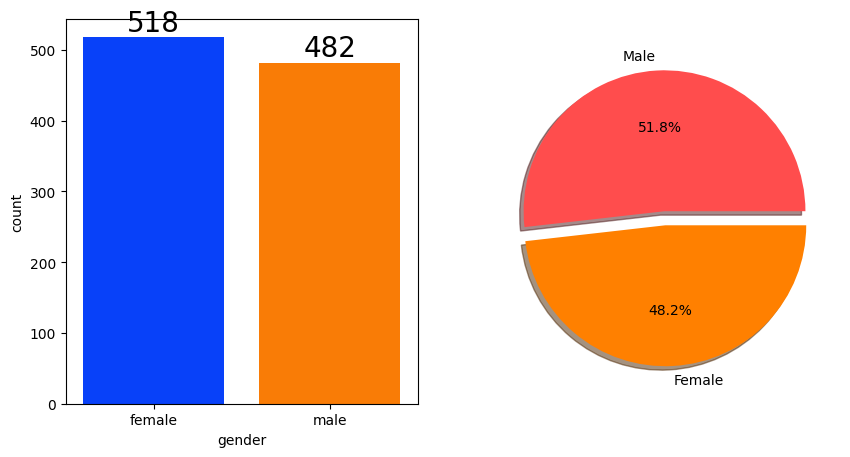

In [48]:
f,ax=plt.subplots(1,2,figsize=(10, 5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Analysis
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

## BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [54]:
gender_group = df.groupby('gender').mean(numeric_features)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


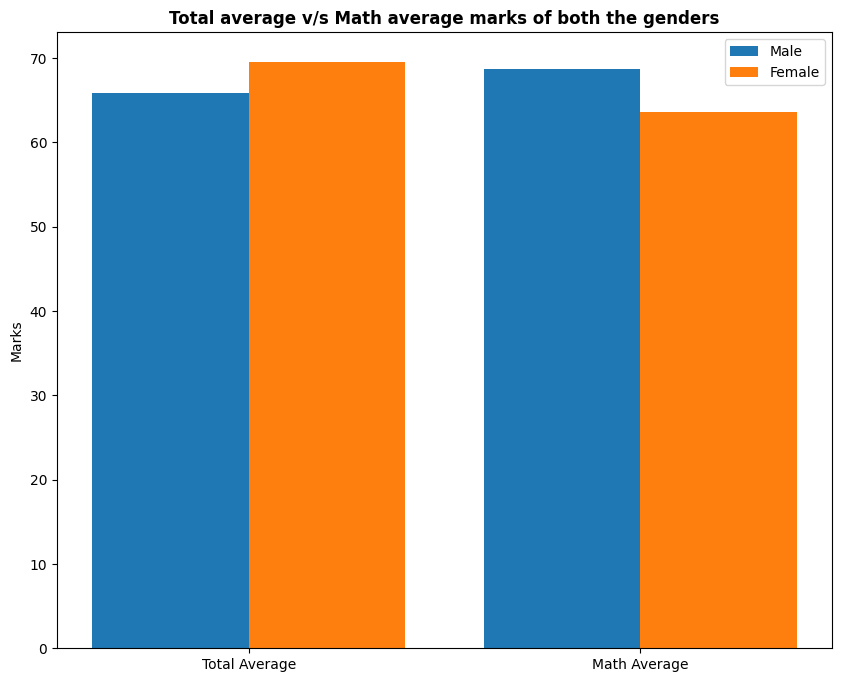

In [55]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Analysis
* On an average females have a better overall score than men, whereas males have scored higher in Maths.